In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier



In [196]:
train = pd.read_csv('../data/train.csv',na_values=" ?")
test = pd.read_csv('../data/test.csv',na_values=" ?")


In [197]:
test.isna().sum()

no                   0
age                  0
workclass         1136
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1141
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     362
dtype: int64

In [198]:
train.isna().sum()

no                   0
age                  0
workclass         1663
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     495
income               0
dtype: int64

In [199]:
print(train.shape)
print(test.shape)


(29305, 16)
(19537, 15)


In [200]:
train.isna().sum()

no                   0
age                  0
workclass         1663
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     495
income               0
dtype: int64

In [1]:
test.isna().sum()

NameError: name 'test' is not defined

In [202]:
test.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [203]:
train['capital-margin'] = train['capital-gain'] - train['capital-loss']
train['capital-total'] = train['capital-gain'] + train['capital-loss']
train['capital-margin-flag'] = np.nan

In [204]:
test['capital-margin'] = test['capital-gain'] - test['capital-loss']
test['capital-total'] = test['capital-gain'] + test['capital-loss']
test['capital-margin-flag'] = np.nan

In [205]:
train.loc[train['capital-margin']==0, 'capital-margin-flag'] = 'zero'
train.loc[train['capital-margin']>0, 'capital-margin-flag'] = 'positive'
train.loc[train['capital-margin']<0, 'capital-margin-flag'] = 'negative'

In [206]:
test.loc[test['capital-margin']==0, 'capital-margin-flag'] = 'zero'
test.loc[test['capital-margin']>0, 'capital-margin-flag'] = 'positive'
test.loc[test['capital-margin']<0, 'capital-margin-flag'] = 'negative'

In [207]:
train.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital-margin,capital-total,capital-margin-flag
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0,0,0,zero
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0,-1721,1721,negative
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0,0,0,zero
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0,0,0,zero
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1,0,0,zero


In [208]:
test['income'] = 0

In [209]:
data = pd.concat([train,test],axis=0)

In [210]:
data.shape

(48842, 19)

In [211]:
data.isna().sum()

no                        0
age                       0
workclass              2799
fnlwgt                    0
education                 0
education-num             0
marital-status            0
occupation             2809
relationship              0
race                      0
sex                       0
capital-gain              0
capital-loss              0
hours-per-week            0
native-country          857
income                    0
capital-margin            0
capital-total             0
capital-margin-flag       0
dtype: int64

### workclass-occupation

In [212]:
data['workclass'] = data['workclass'].fillna("temp")

In [213]:
data['occupation'] = data['occupation'].fillna("temp")

In [214]:
data['workclass-occupation'] = data['workclass']+"#"+data['occupation']

In [215]:
data['workclass-occupation']

0             Private# Machine-op-inspct
1                 Private# Other-service
2             Private# Handlers-cleaners
3                  Private# Tech-support
4              Private# Transport-moving
                      ...               
19532     Self-emp-not-inc# Craft-repair
19533           Private# Exec-managerial
19534            Private# Prof-specialty
19535                     Private# Sales
19536              Private# Tech-support
Name: workclass-occupation, Length: 48842, dtype: object

race-sex

In [216]:
data['race-sex'] = data['race'] + data['sex']

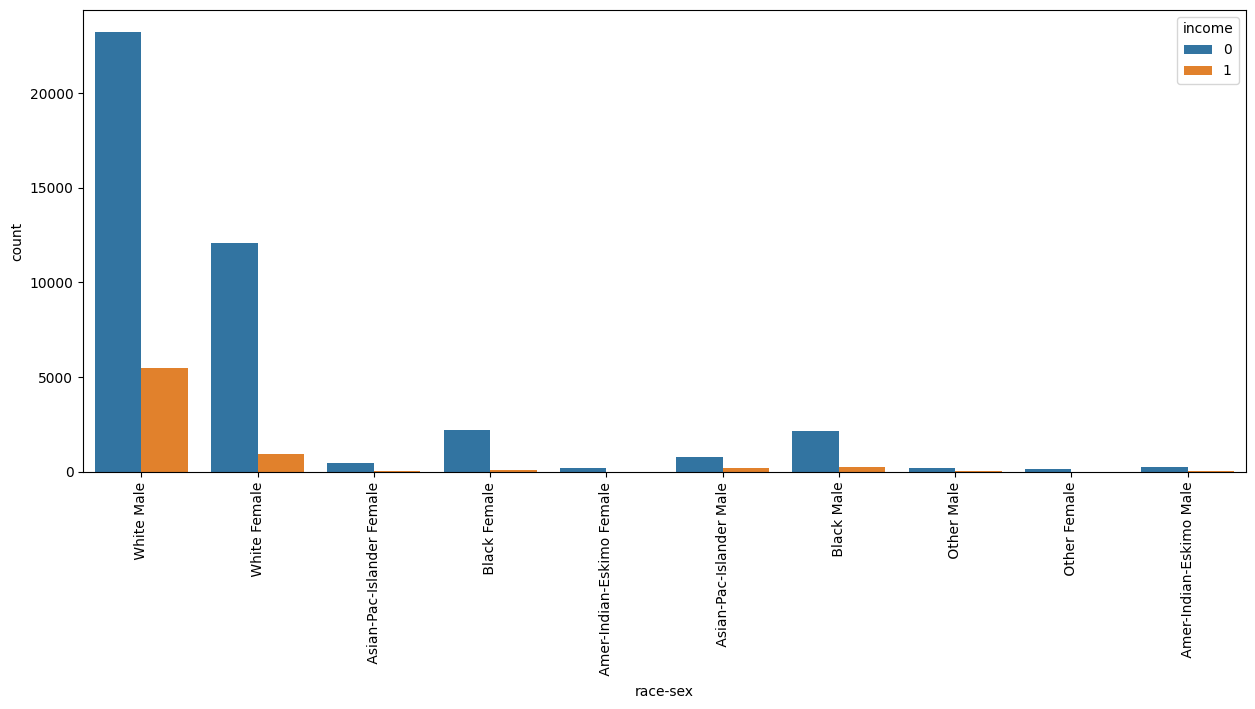

In [217]:
plt.figure(figsize=(15,6))
sns.countplot(data, x='race-sex', hue='income')
plt.xticks(rotation=90)
plt.show()

### marital-status + relationship	


In [218]:
data['marital-status-relationship'] = data['marital-status']+"#"+data['relationship']

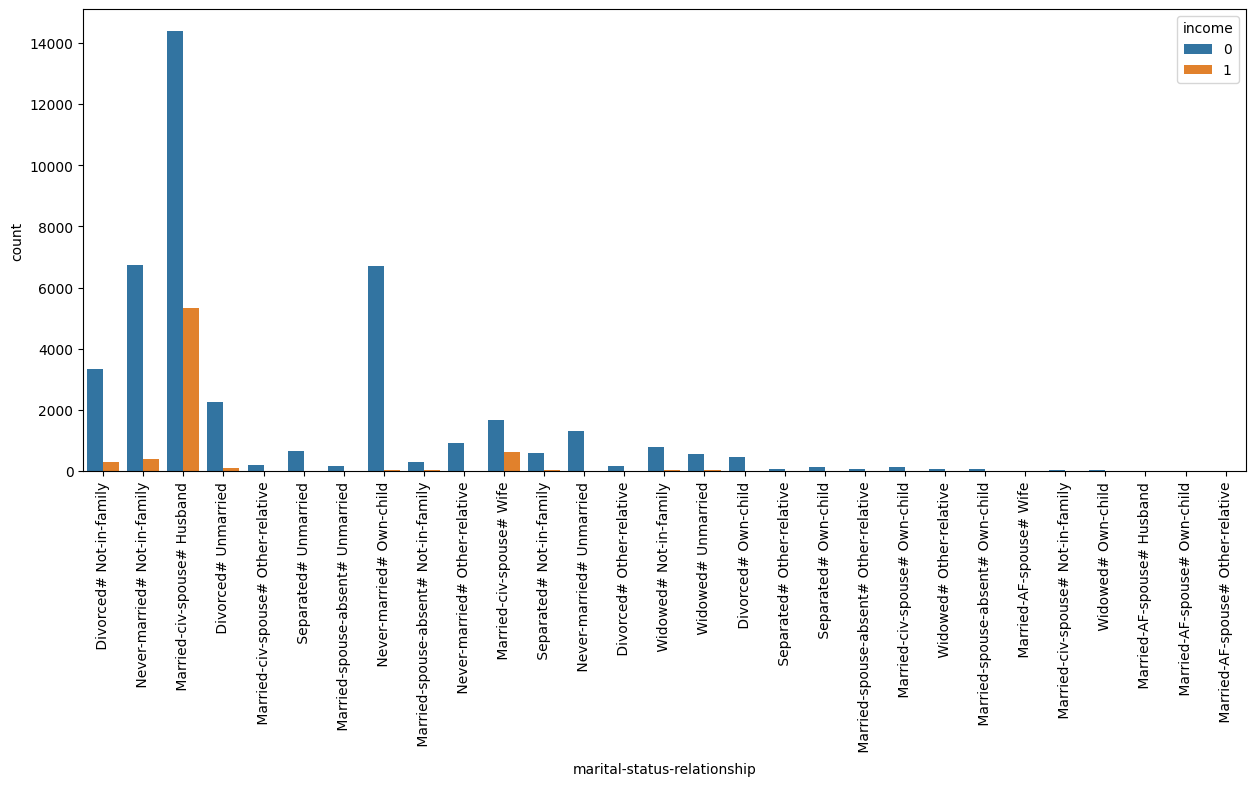

In [219]:
plt.figure(figsize=(15,6))
sns.countplot(data, x='marital-status-relationship', hue='income')
plt.xticks(rotation=90)
plt.show()

### fnlwgt

In [220]:
#data.drop('fnlwgt', axis=1, inplace=True)

### no

In [221]:
data.drop('no', axis=1, inplace=True)

In [222]:
data.isna().sum()

age                              0
workclass                        0
fnlwgt                           0
education                        0
education-num                    0
marital-status                   0
occupation                       0
relationship                     0
race                             0
sex                              0
capital-gain                     0
capital-loss                     0
hours-per-week                   0
native-country                 857
income                           0
capital-margin                   0
capital-total                    0
capital-margin-flag              0
workclass-occupation             0
race-sex                         0
marital-status-relationship      0
dtype: int64

### native-country

In [223]:
data['native-country']=data['native-country'].fillna(" United-States ")

In [224]:
data['native-country'].value_counts()

 United-States                 43832
 Mexico                          951
 United-States                   857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

In [225]:
data['workclass-education'] = data['workclass'] +"#" + data['education']

In [226]:
data['occupation-education']= data['occupation'] +"#" + data['education']

In [ ]:
data.to_csv('../data/pros.csv', index=False)

In [227]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [228]:
cate_list = []

In [229]:
data_label = data

In [230]:
for col in data_label.columns:
    if(data[col].dtype.name=="object"):
        cate_list.append(col)
        le.fit(list(data[col].values))
        data_label[col] = le.transform(list(data_label[col].values))


In [270]:
# data.to_csv('../data/pros.csv', index=False)

In [231]:
X = data.iloc[:29305,:]
y = data.iloc[29305:,:].drop("income", axis=1)

In [232]:
X_train = X.drop("income", axis=1)
y_train = X['income']

In [233]:
import xgboost as xgb

model= xgb.XGBClassifier(booster='gbtree', # 트리,회귀(gblinear) 트리가 항상 
                     # 더 좋은 성능을 내기 때문에 수정할 필요없다고한다.
    learning_rate = 0.1,
    silent=True,  # running message출력안한다.
                 # 모델이 적합되는 과정을 이해하기위해선 False으로한다.
    
    min_child_weight=10 ,  # 값이 높아지면 under-fitting 되는 
                          # 경우가 있다. CV를 통해 튜닝되어야 한다.
    
    max_depth=6 ,    # 트리의 최대 깊이를 정의함. 
    subsample=0.8,
    seed=42,
    objective ='binary:logistic',

    )

In [234]:
model.fit(X_train,y_train)

[12:13:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [246]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=5).mean()


[12:15:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:15:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:15:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:15:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:15:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



0.870841153386794

In [236]:
# pre = model.predict(y)
# pre

array([0, 0, 1, ..., 1, 0, 0])

In [237]:
# sub = pd.read_csv("../data/sample_submission.csv")
# sub['income'] = pre


In [238]:
#sub.to_csv("./23_04_26(XGBOOST,pros).csv", index=False)

In [239]:
params = {'max_depth':6,
         'eta':0.1,
         'objective':'binary:logistic',
         'eval_metric':'logloss',
         'seed':42,
         'learning_rate':0.1,
         'early_stoppings':100}

num_rounds=400

In [240]:
import xgboost as xgb

model= xgb.XGBClassifier(booster='gbtree', # 트리,회귀(gblinear) 트리가 항상 
                     # 더 좋은 성능을 내기 때문에 수정할 필요없다고한다.
    learning_rate = 0.1,
    silent=True,  # running message출력안한다.
                 # 모델이 적합되는 과정을 이해하기위해선 False으로한다.
    max_depth=6 ,    # 트리의 최대 깊이를 정의함. 
    subsample=0.8,
    seed=42,
    eta=0.1,
    objective ='binary:logistic',

    )

In [241]:
model.fit(X_train,y_train)

[12:13:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [242]:
cross_val_score(model, X_train,y_train, cv=5).mean()

[12:13:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:13:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:13:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:13:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:13:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



0.870841153386794

In [243]:
pre = model.predict(y)
pre

array([0, 0, 1, ..., 1, 0, 0])

In [245]:
sub = pd.read_csv("../data/sample_submission.csv")
sub['income'] = pre
sub.to_csv("./23_04_26(XGBOOST,pros,3).csv", index=False)

### 하이퍼파라미터 수정

model= xgb.XGBClassifier(booster='gbtree', # 트리,회귀(gblinear) 트리가 항상 
                    
    learning_rate = 0.1,
    silent=True,  
                
    max_depth=6 , 
    subsample=0.8,
    seed=42,
    eta=0.1,
    objective ='binary:logistic'

- 0.870841153386794

In [247]:
import xgboost as xgb

model_test= xgb.XGBClassifier(booster='gbtree', # 트리,회귀(gblinear) 트리가 항상 
                     # 더 좋은 성능을 내기 때문에 수정할 필요없다고한다.
    learning_rate = 0.1,
    silent=True,  # running message출력안한다.
                 # 모델이 적합되는 과정을 이해하기위해선 False으로한다.
    max_depth=7 ,    # 트리의 최대 깊이를 정의함. 
    subsample=0.8,
    seed=42,
    eta=0.1,
    objective ='binary:logistic',

    )

In [248]:
model_test.fit(X_train,y_train)

[12:16:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [252]:
cross_val_score(model_test, X_train,y_train).mean()
#0.8712506398225559

[12:17:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:17:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:17:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:17:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:17:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



0.8712506398225559

In [253]:
pre = model_test.predict(y)

In [254]:
sub['income']=pre
sub.to_csv("./23_04_26(XGBOOST,pros,4).csv", index=False)

### 데이터 스케일링

In [255]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()

In [256]:
mn.fit(X_train)

MinMaxScaler()

In [260]:
X_train_scaled = mn.transform(X_train)
X_test_scaled = mn.transform(y)

In [261]:
import xgboost as xgb

model_scaled= xgb.XGBClassifier(booster='gbtree', # 트리,회귀(gblinear) 트리가 항상 
                     # 더 좋은 성능을 내기 때문에 수정할 필요없다고한다.
    learning_rate = 0.1,
    silent=True,  # running message출력안한다.
                 # 모델이 적합되는 과정을 이해하기위해선 False으로한다.
    max_depth=7 ,    # 트리의 최대 깊이를 정의함. 
    subsample=0.8,
    seed=42,
    eta=0.1,
    objective ='binary:logistic',

    )

In [263]:
model_scaled.fit(X_train_scaled,y_train)

[12:21:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [265]:
cross_val_score(model_scaled,X_train_scaled, y_train).mean()

[12:22:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:22:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:22:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:22:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[12:22:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



0.8703975430813854

In [268]:
pre = model_scaled.predict(X_test_scaled)

In [269]:
sub['income']=pre
sub.to_csv("./23_04_26(XGBOOST,pros,minmax,5).csv", index=False)

In [282]:
from xgboost import XGBClassifier

xgb_params = XGBClassifier(booster='gbtree', seed=42,subsample=0.8,objective='binary:logistic')

In [284]:
params={
    'n_estimators':[100,200,300,400,500],
    'learning_rate':[0.05,0.1,0.15,0.2],
    'max_depth':[5,6,7]
    
    
}
grid_cv= GridSearchCV(xgb_params, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train,y_train)
pred=grid_cv.predict(y)

print('최적의 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))